Os dados foram obtidos através do site https://ceb.nlm.nih.gov/repositories/malaria-datasets. No qual possui imagens reais de individuos que foram infectados com malária e não infectados. Desta forma, pretende-se criar um modelo CNN que possa através de uma nova imagem realizar a descriminação entre infectado e não infectado, criando uma ferramenta capaz de auxiliar a detecção desta doença.

In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
#from google.colab import drive
#drive.mount('/colab_notebooks')

In [6]:
my_data_dir = 'H:/Meu Drive/colab_notebooks/projetos/classificacao_de_imagem_cnn/'

In [7]:
test_path = 'H:/Meu Drive/colab_notebooks/projetos/classificacao_de_imagem_cnn/cell_images/test'
train_path = 'H:/Meu Drive/colab_notebooks/projetos/classificacao_de_imagem_cnn/cell_images/train'

In [8]:
para_cell = 'H:/Meu Drive/colab_notebooks/projetos/classificacao_de_imagem_cnn/cell_images/test/parasitized'

In [9]:
listdir = os.listdir(para_cell)
print(listdir[:10])

['C100P61ThinF_IMG_20150918_150041_cell_148.png', 'C101P62ThinF_IMG_20150918_151006_cell_64.png', 'C101P62ThinF_IMG_20150918_151239_cell_80.png', 'C101P62ThinF_IMG_20150918_151239_cell_88.png', 'C101P62ThinF_IMG_20150918_151239_cell_99.png', 'C101P62ThinF_IMG_20150918_151335_cell_58.png', 'C101P62ThinF_IMG_20150918_151335_cell_66.png', 'C101P62ThinF_IMG_20150918_151507_cell_60.png', 'C101P62ThinF_IMG_20150918_151507_cell_63.png', 'C101P62ThinF_IMG_20150918_151507_cell_65.png']


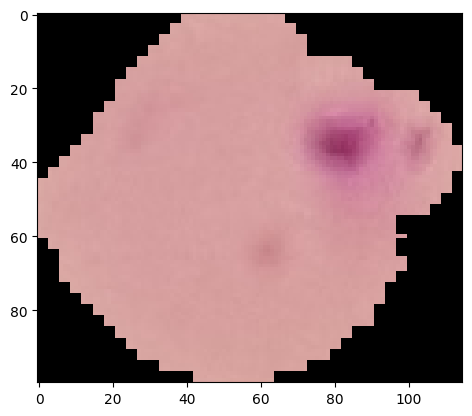

In [10]:
img = imread(os.path.join(para_cell, listdir[22]))
plt.imshow(img)

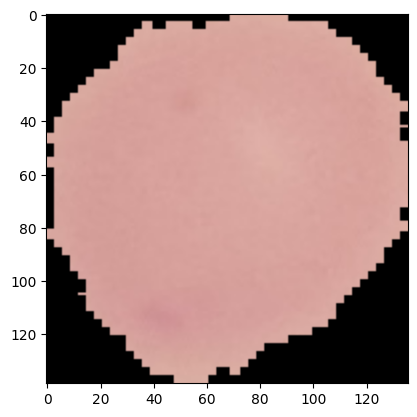

In [11]:
uninfected_cell_path = 'H:/Meu Drive/colab_notebooks/projetos/classificacao_de_imagem_cnn/cell_images/test/uninfected'
uninfected_cell = imread(os.path.join(uninfected_cell_path, os.listdir(uninfected_cell_path)[5]))
plt.imshow(uninfected_cell)

Checando a quantidade de imagens:

In [12]:
len(os.listdir(os.path.join(train_path,'parasitized')))

12479

In [13]:
uninfected_cell.shape

(139, 136, 3)

In [14]:
len(os.listdir(os.path.join(train_path,'uninfected')))

12479

In [15]:
infected_cell = imread(os.path.join(para_cell, os.listdir(para_cell)[5]))
infected_cell.shape

(154, 154, 3)

In [16]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'//uninfected'):

    img = imread(test_path+'//uninfected'+'//'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

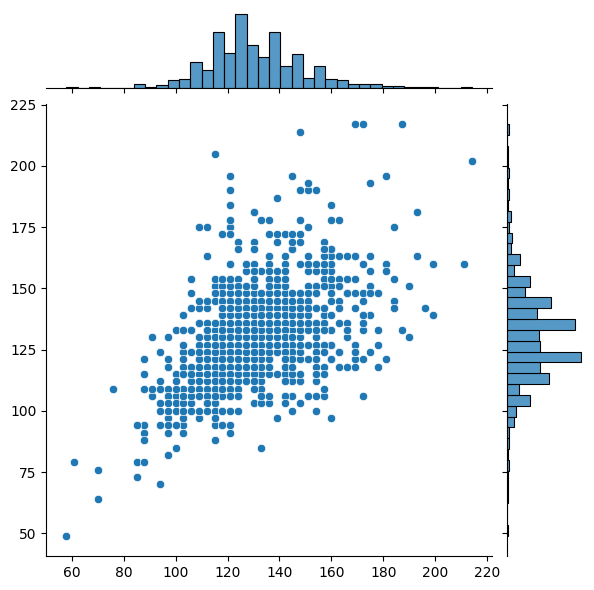

In [17]:
sns.jointplot(x=dim1, y=dim2)

In [18]:
np.mean(dim1)

130.71754523996853

In [19]:
np.mean(dim2)

130.58772619984265

In [20]:
image_shape = (130,130,3)

Gerando várias imagens manipuladas a partir de um diretório

Para usar .flow_from_directory, deve-se organizar as imagens em subdiretórios. Os diretórios devem conter apenas imagens de uma classe, ou seja, uma pasta por classe de imagens.

Estrutura necessária:

* Pasta de dados da imagem
* Classe 1
  * 0.jpg
  * 1.jpg
  * ...
* Classe 2
  * 0.jpg
  * 1.jpg
  * ...
* ...
* Classe n

Preparação dos dados para modelagem

Existem muitas imagens para serem lidas todas de uma vez, desta forma, utilizaremos funções do módulo Keras para processar os dados automatimanete, gerar um fluxo do diretório e manipular as imagens.

Criando o modelo

In [21]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Os dropouts ajudam a reduzir o overfitting ao desligar aleatoriamente os neurônios durante o treinamento.
# Aqui dizemos que desligamos aleatoriamente 50% dos neurônios.
model.add(Dropout(0.5))

# Última camada, dados binários então utiliza-se ativação sigmóide
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,209 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [24]:
batch_size = 16

Treinando modelo

In [26]:
# Criar o ImageDataGenerator (normaliza os pixels e aplica aumentos de dados)
image_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=20,
                               zoom_range=0.15,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.15,
                               horizontal_flip=True,
                               fill_mode='nearest')

# Gerar o fluxo de imagens a partir do diretório de treino
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [27]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2564 images belonging to 2 classes.


In [28]:
results = model.fit(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])

Epoch 1/20


c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1560/1560 ━━━━━━━━━━━━━━━━━━━━ 509s 325ms/step - accuracy: 0.7928 - loss: 0.4558 - val_accuracy: 0.9501 - val_loss: 0.1497
Epoch 2/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 466s 298ms/step - accuracy: 0.9397 - loss: 0.1940 - val_accuracy: 0.9473 - val_loss: 0.1548
Epoch 3/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 442s 282ms/step - accuracy: 0.9475 - loss: 0.1715 - val_accuracy: 0.9454 - val_loss: 0.1495
Epoch 4/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 367s 235ms/step - accuracy: 0.9454 - loss: 0.1700 - val_accuracy: 0.9528 - val_loss: 0.1388
Epoch 5/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 363s 232ms/step - accuracy: 0.9508 - loss: 0.1591 - val_accuracy: 0.9567 - val_loss: 0.1437
Epoch 6/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 357s 228ms/step - accuracy: 0.9500 - loss: 0.1576 - val_accuracy: 0.9532 - val_loss: 0.1461


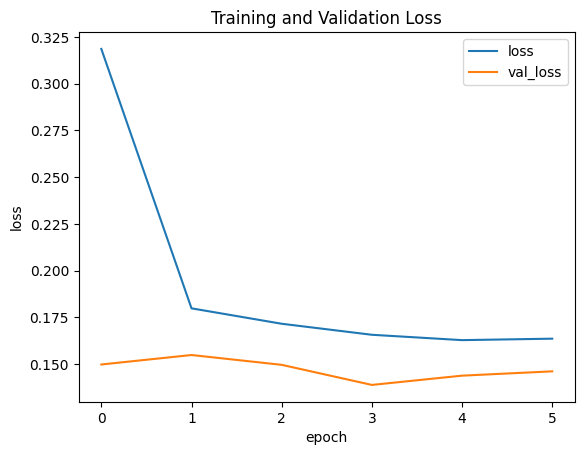

In [29]:
losses = pd.DataFrame(results.history)
losses[['loss', 'val_loss']].plot()
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [30]:
model.metrics_names

['loss', 'compile_metrics']

In [31]:
model.evaluate(test_image_gen)

161/161 ━━━━━━━━━━━━━━━━━━━━ 27s 168ms/step - accuracy: 0.9193 - loss: 0.2079


[0.15357927978038788, 0.9477379322052002]

In [32]:
pred_probabilities = model.predict(test_image_gen)

161/161 ━━━━━━━━━━━━━━━━━━━━ 28s 175ms/step


In [33]:
pred_probabilities

array([[1.1747931e-03],
       [1.3259763e-03],
       [1.7808528e-04],
       ...,
       [9.6805578e-01],
       [9.8643225e-01],
       [9.7242790e-01]], dtype=float32)

In [34]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [35]:
predictions = pred_probabilities > 0.5

In [36]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [37]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1293
           1       0.92      0.99      0.95      1271

    accuracy                           0.95      2564
   macro avg       0.95      0.95      0.95      2564
weighted avg       0.95      0.95      0.95      2564



In [38]:
confusion_matrix(test_image_gen.classes, predictions)

array([[1183,  110],
       [  16, 1255]], dtype=int64)

Prevendo uma imagem

In [40]:
image_path = os.path.join(para_cell, listdir[0])
my_image = image.load_img(image_path, target_size=image_shape[:2])

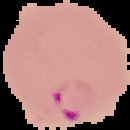

In [41]:
my_image

In [42]:
my_image = image.img_to_array(my_image)

In [43]:
type(my_image)

numpy.ndarray

In [44]:
my_image.shape

(130, 130, 3)

In [45]:
my_image = np.expand_dims(my_image, axis=0)

In [46]:
model.predict(my_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[0.]], dtype=float32)